## Decision Tree notes
* Root Assigning
  * Gini index
  * Entropy


## Tasks
* Search for
  1. How does the Gini index work with numerical features like 'age'?
  2. What is 'Entropy with information gain' and how does it work?
  3. Compare Between Gini and Entropy, and which is better for the decision tree.
* Implement Decision Tree on Breast Cancer Dataset


In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [309]:
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [310]:
df['Unnamed: 32'].unique()

array([nan])

In [311]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [313]:
df.duplicated().sum()

np.int64(0)

In [314]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [315]:
y.value_counts(normalize=True)

,proportion
diagnosis,
B,0.627417
M,0.372583


In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 42)

In [317]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [318]:
y_train.shape, y_test.shape

((455,), (114,))

In [319]:
le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [320]:
preprocessor = ColumnTransformer(
    transformers=[('num', preprocessing.StandardScaler(), X_train.columns)],
    remainder='drop'
)

In [321]:
pipe_knn = Pipeline([
    ('pre', preprocessor),
    ('model', KNeighborsClassifier())
])

grid_knn = {
    'model__n_neighbors' : list(range(1, 15)),
    'model__p' : [2]
}

In [322]:
pipe_log = Pipeline([
    ('pre', preprocessor),
    ('model', LogisticRegression())
])

grid_log = {
    'model__penalty' : ['l2'],
    'model__solver' : ['lbfgs', 'saga', 'liblinear'],
    'model__C' : [0.5, 1, 1.5, 2]
}

In [323]:
pipe_svm = Pipeline([
    ('pre', preprocessor),
    ('model', SVC())
])

grid_svm = {
    'model__C' : [0.5, 1, 1.5, 2],
    'model__kernel' : ['linear', 'poly', 'rbf'],
}

In [324]:
gs_knn = GridSearchCV(pipe_knn, grid_knn, scoring='recall', cv=5)
gs_log = GridSearchCV(pipe_log, grid_log, scoring='recall', cv=5)
gs_svm = GridSearchCV(pipe_svm, grid_svm, scoring='recall', cv=5)

In [325]:
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_...
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14],
                         'model__p': [2]},
             scoring='recall')

In [326]:
print(f"Best Score: {gs_knn.best_score_}, Best Parameters: {gs_knn.best_params_}")

Best Score: 0.9235294117647059, Best Parameters: {'model__n_neighbors': 3, 'model__p': 2}


In [327]:
gs_log.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_...
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.5, 1, 1.5, 2], 'model__penalty': ['l2'],
                         'model__solver': ['lbfgs', 'saga', 'liblinear']},
             scoring='recall')

In [328]:
print(f"Best Score: {gs_log.best_score_}, Best Parameters: {gs_log.best_params_}")

Best Score: 0.9529411764705882, Best Parameters: {'model__C': 0.5, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [329]:
gs_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_...
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])),
                                       ('model', SVC())]),
             param_grid={'model__C': [0.5, 1, 1.5, 2],
                         'model__kernel': ['linear', 'poly', 'rbf']},
             scoring='recall')

In [330]:
print(f"Best Score: {gs_svm.best_score_}, Best Parameters: {gs_svm.best_params_}")

Best Score: 0.9529411764705882, Best Parameters: {'model__C': 1, 'model__kernel': 'rbf'}


In [331]:
def evaluate(search, X_test, y_test):
  best_model = search.best_estimator_
  y_pred = best_model.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)

  print(f"Accuracy: {acc}")
  print(f"Precision: {prec}")
  print(f"Recall: {recall}")
  print(f"f1 Score: {f1}")

  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

  return best_model

Accuracy: 0.9385964912280702
Precision: 0.972972972972973
Recall: 0.8571428571428571
f1 Score: 0.9113924050632911


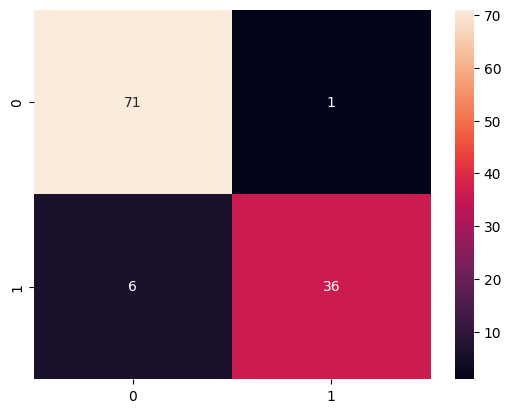

In [332]:
best_knn = evaluate(gs_knn, X_test, y_test)

Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9523809523809523
f1 Score: 0.975609756097561


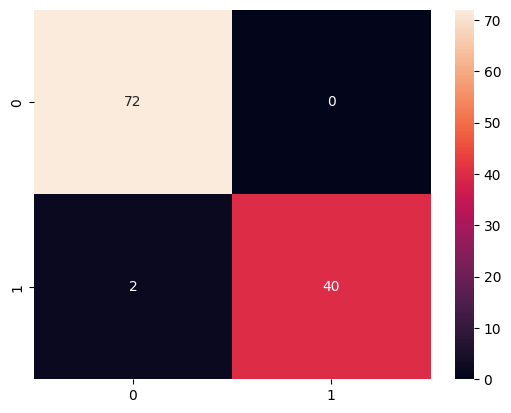

In [333]:
best_log = evaluate(gs_log, X_test, y_test)

Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9285714285714286
f1 Score: 0.9629629629629629


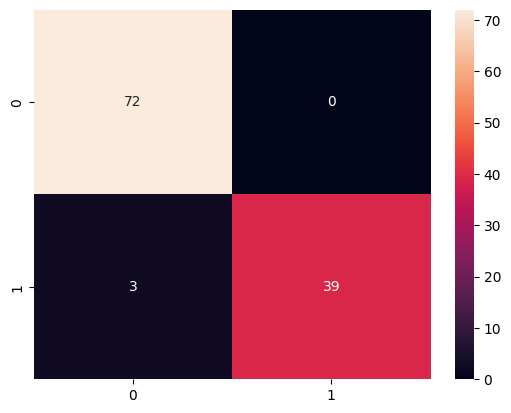

In [334]:
best_svm = evaluate(gs_svm, X_test, y_test)

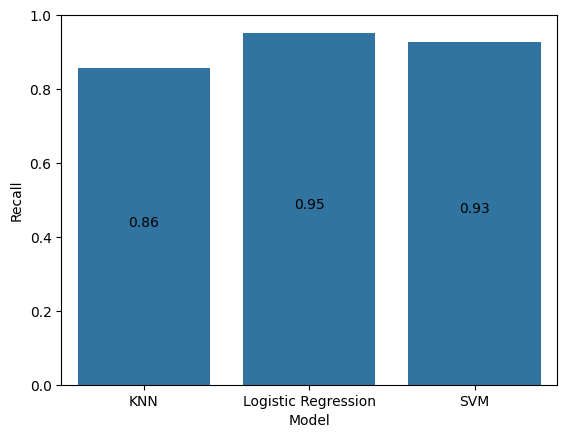

In [335]:
model_names = ['KNN', 'Logistic Regression', 'SVM']
recalls = [recall_score(y_test, best_knn.predict(X_test)),
           recall_score(y_test, best_log.predict(X_test)),
           recall_score(y_test, best_svm.predict(X_test))]

ax = sns.barplot(x=model_names, y=recalls)
plt.ylabel("Recall")
plt.xlabel("Model")
plt.ylim(0, 1)
for i, v in enumerate(recalls):
  ax.text(i, v/2, f"{v:.2f}", ha='center')
plt.show()